In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [102]:
df=pd.read_csv('SCADA_data.csv')
df.head()

,Time,Error,WEC: ava. windspeed,WEC : max. windspeed,WEC : min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,...,CS101 : Nacelle cabinet temp.,CS101 : Main carrier temp.,CS101 : Rectifier cabinet temp.,CS101 : Yaw inverter cabinet temp.,CS101 : Fan inverter cabinet temp.,CS101 : Ambient temp.,CS101 : Tower temp.,CS101 : Control cabinet temp.,CS101 : Transformer temp.,RTU: ava. Setpoint 1
0,01/05/2014 00:00:00,0,6.9,9.4,2.9,0.0,0.02,0.0,0,0,...,22,13,24,20,25,12,14,24,34,2501
1,01/05/2014 00:10:00,0,5.3,8.9,1.6,0.0,0.01,0.0,0,0,...,21,13,24,20,25,12,14,24,34,2501
2,01/05/2014 00:20:00,0,5.0,9.5,1.4,0.0,0.04,0.0,0,0,...,21,13,24,20,25,12,14,24,34,2501
3,01/05/2014 00:30:00,0,4.4,8.3,1.3,0.0,0.08,0.0,0,0,...,20,13,23,21,25,12,14,24,34,2501
4,01/05/2014 00:40:00,0,5.7,9.7,1.2,0.0,0.05,0.0,0,0,...,20,13,23,21,25,12,14,23,34,2501


In [106]:
df['Inverter avg. temp']=df[[ 'CS101 : Sys 1 inverter 2 cabinet temp.',
       'CS101 : Sys 1 inverter 3 cabinet temp.',
       'CS101 : Sys 1 inverter 4 cabinet temp.',
       'CS101 : Sys 1 inverter 5 cabinet temp.',
       'CS101 : Sys 1 inverter 6 cabinet temp.',
       'CS101 : Sys 1 inverter 7 cabinet temp.',
       'CS101 : Sys 2 inverter 1 cabinet temp.',
       'CS101 : Sys 2 inverter 2 cabinet temp.',
       'CS101 : Sys 2 inverter 3 cabinet temp.',
       'CS101 : Sys 2 inverter 4 cabinet temp.',
       'CS101 : Sys 2 inverter 5 cabinet temp.',
       'CS101 : Sys 2 inverter 6 cabinet temp.',
       'CS101 : Sys 2 inverter 7 cabinet temp.']].mean(axis=1)

df['Inverter std. temp']=df[[ 'CS101 : Sys 1 inverter 2 cabinet temp.',
       'CS101 : Sys 1 inverter 3 cabinet temp.',
       'CS101 : Sys 1 inverter 4 cabinet temp.',
       'CS101 : Sys 1 inverter 5 cabinet temp.',
       'CS101 : Sys 1 inverter 6 cabinet temp.',
       'CS101 : Sys 1 inverter 7 cabinet temp.',
       'CS101 : Sys 2 inverter 1 cabinet temp.',
       'CS101 : Sys 2 inverter 2 cabinet temp.',
       'CS101 : Sys 2 inverter 3 cabinet temp.',
       'CS101 : Sys 2 inverter 4 cabinet temp.',
       'CS101 : Sys 2 inverter 5 cabinet temp.',
       'CS101 : Sys 2 inverter 6 cabinet temp.',
       'CS101 : Sys 2 inverter 7 cabinet temp.']].std(axis=1)

In [112]:
df['Time']=pd.to_datetime(df['Time'],dayfirst=True,errors='coerce')
df.sort_values(by='Time',axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [114]:
df.rename(columns={'Error':'Fault'},inplace=True)

In [147]:
df['Fault']=[0]*len(df)
df.Fault.value_counts()

0    49027
Name: Fault, dtype: int64

In [128]:
status_data_wec = pd.read_csv('status_data_wec.csv')
af_corr_time_wec_s = status_data_wec.loc[(status_data_wec['Main Status']==62)|(status_data_wec['Main Status']==80)|
                                         (status_data_wec['Main Status']==228)|(status_data_wec['Main Status']==60)|
                                         (status_data_wec['Main Status']==9),
                                         'Time']

In [129]:
af_corr_time_wec_s=pd.to_datetime(af_corr_time_wec_s)
af_corr_time_wes=af_corr_time_wec_s.round('10min')

In [148]:
# 将df 中的时间与af_corr_time_wes的时间相同的样本的Fault设置为1
for i,d in enumerate(df['Time']):
    if d in af_corr_time_wes.values:
        df['Fault'][i]=1

C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [149]:
df.Fault.value_counts()

0    48886
1      141
Name: Fault, dtype: int64

In [150]:
# 计算当前时间到最近的Fault之间的时间是多少
nf_times=[]
rul=[]
for i,d in enumerate(df['Fault']):
    nf_times.append(df['Time'][i])
    if d==1:
        for j in nf_times:
            rul.append(df['Time'][i]-j)
        nf_times=[]

In [154]:
rul_days=[x.days for x in rul]

In [156]:
df_trimmed=df.head(len(rul))

In [158]:
df_trimmed['RUL']=rul_days

C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
cols_to_drop = ['Fault',
                'CS101 : Sys 1 inverter 1 cabinet temp.',
                'CS101 : Sys 1 inverter 2 cabinet temp.', 
                'CS101 : Sys 1 inverter 3 cabinet temp.', 
                'CS101 : Sys 1 inverter 4 cabinet temp.', 
                'CS101 : Sys 1 inverter 5 cabinet temp.', 
                'CS101 : Sys 1 inverter 6 cabinet temp.', 
                'CS101 : Sys 1 inverter 7 cabinet temp.',
                'CS101 : Sys 2 inverter 1 cabinet temp.', 
                'CS101 : Sys 2 inverter 2 cabinet temp.',  
                'CS101 : Sys 2 inverter 3 cabinet temp.',
                'CS101 : Sys 2 inverter 4 cabinet temp.']

In [177]:
#df_trimmed.drop(cols_to_drop,axis=1,inplace=True)

In [180]:
df_trimmed.head()

,WEC: ava. windspeed,WEC : max. windspeed,WEC : min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,WEC: ava. Nacel position including cable twisting,...,CS101 : Yaw inverter cabinet temp.,CS101 : Fan inverter cabinet temp.,CS101 : Ambient temp.,CS101 : Tower temp.,CS101 : Control cabinet temp.,CS101 : Transformer temp.,RTU: ava. Setpoint 1,Inverter avg. temp,Inverter std. temp,RUL
Time,,,,,,,,,,,,,,,,,,,,,
2014-05-01 00:00:00,6.9,9.4,2.9,0.0,0.02,0.0,0,0,0,640,...,20,25,12,14,24,34,2501,14.615385,23.059844,5
2014-05-01 00:10:00,5.3,8.9,1.6,0.0,0.01,0.0,0,0,0,640,...,20,25,12,14,24,34,2501,14.615385,23.059844,5
2014-05-01 00:20:00,5.0,9.5,1.4,0.0,0.04,0.0,0,0,0,640,...,20,25,12,14,24,34,2501,14.615385,23.059844,5
2014-05-01 00:30:00,4.4,8.3,1.3,0.0,0.08,0.0,0,0,0,641,...,21,25,12,14,24,34,2501,14.615385,23.059844,5
2014-05-01 00:40:00,5.7,9.7,1.2,0.0,0.05,0.0,0,0,0,633,...,21,25,12,14,23,34,2501,14.615385,23.059844,5


In [179]:
df_trimmed.set_index('Time',inplace=True)

In [181]:
df_trimmed.shape

(39442, 53)

In [183]:
df_trimmed=df_trimmed.head(39298)
df=df_trimmed.copy()
features=df_trimmed.columns.tolist()

In [186]:
df_list=[df[features].shift(shift_val) if shift_val==0 else df[features].shift(-shift_val).add_suffix(f'_{shift_val}') 
        for shift_val in range(0,5)]

In [194]:
df_concat=pd.concat(df_list,axis=1,sort=False)

In [196]:
df_concat=df_concat.iloc[:-5,:]

In [201]:
from sklearn.model_selection import train_test_split
target='RUL'
x_train,x_test,y_train,y_test=train_test_split(df_concat,
                                              df.iloc[:-5,:][target],
                                              test_size=.02642894598,
                                              random_state=0,
                                              shuffle=False)

In [206]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE,mean_absolute_error as MAE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

In [207]:
xgbr=xgb.XGBRegressor()
param_grid={
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [30, 40, 50, 60, 70, 90, 80, 100],
        'objective': ['reg:squarederror']
}

In [208]:
rf_xgbr=RandomizedSearchCV(xgbr,
                          param_grid,
                          cv=5,
                          n_jobs=1)

In [209]:
rf_xgbr.fit(x_train,y_train)

C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not 

C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                                              0.7, 0.8, 0.9,
                                                              1.0],
                                        'cols

In [210]:
y_pred=rf_xgbr.predict(x_test)

C:\Users\bo.pei\softwares\Anaconda\Install2020\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [213]:
rmse=np.sqrt(MSE(y_test,y_pred))
print('RMSE:%f'%(rmse))

RMSE:0.020167


In [220]:
df_out=pd.DataFrame()
df_out['true']=np.ravel(y_test.values)
df_out['pred']=np.ravel(y_pred)

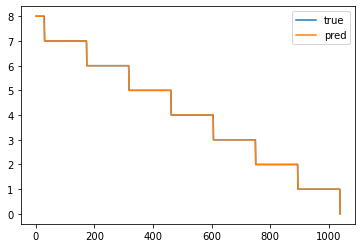

In [222]:
df_out.plot()

Text(0, 0.5, 'Pred Value')

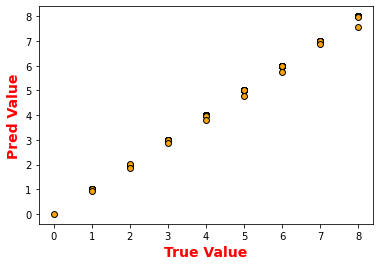

In [236]:
import matplotlib.pyplot as plt
plt.scatter(df_out['true'].values,df_out['pred'].values,s=35,edgecolor='k',color='orange')
plt.xlabel('True Value',color='r',fontweight='bold',fontsize=14)
plt.ylabel('Pred Value',color='r',fontweight='bold',fontsize=14)

In [237]:
import pickle
pickle.dump(rf_xgbr,open('xgb_reg.pkl','wb'))